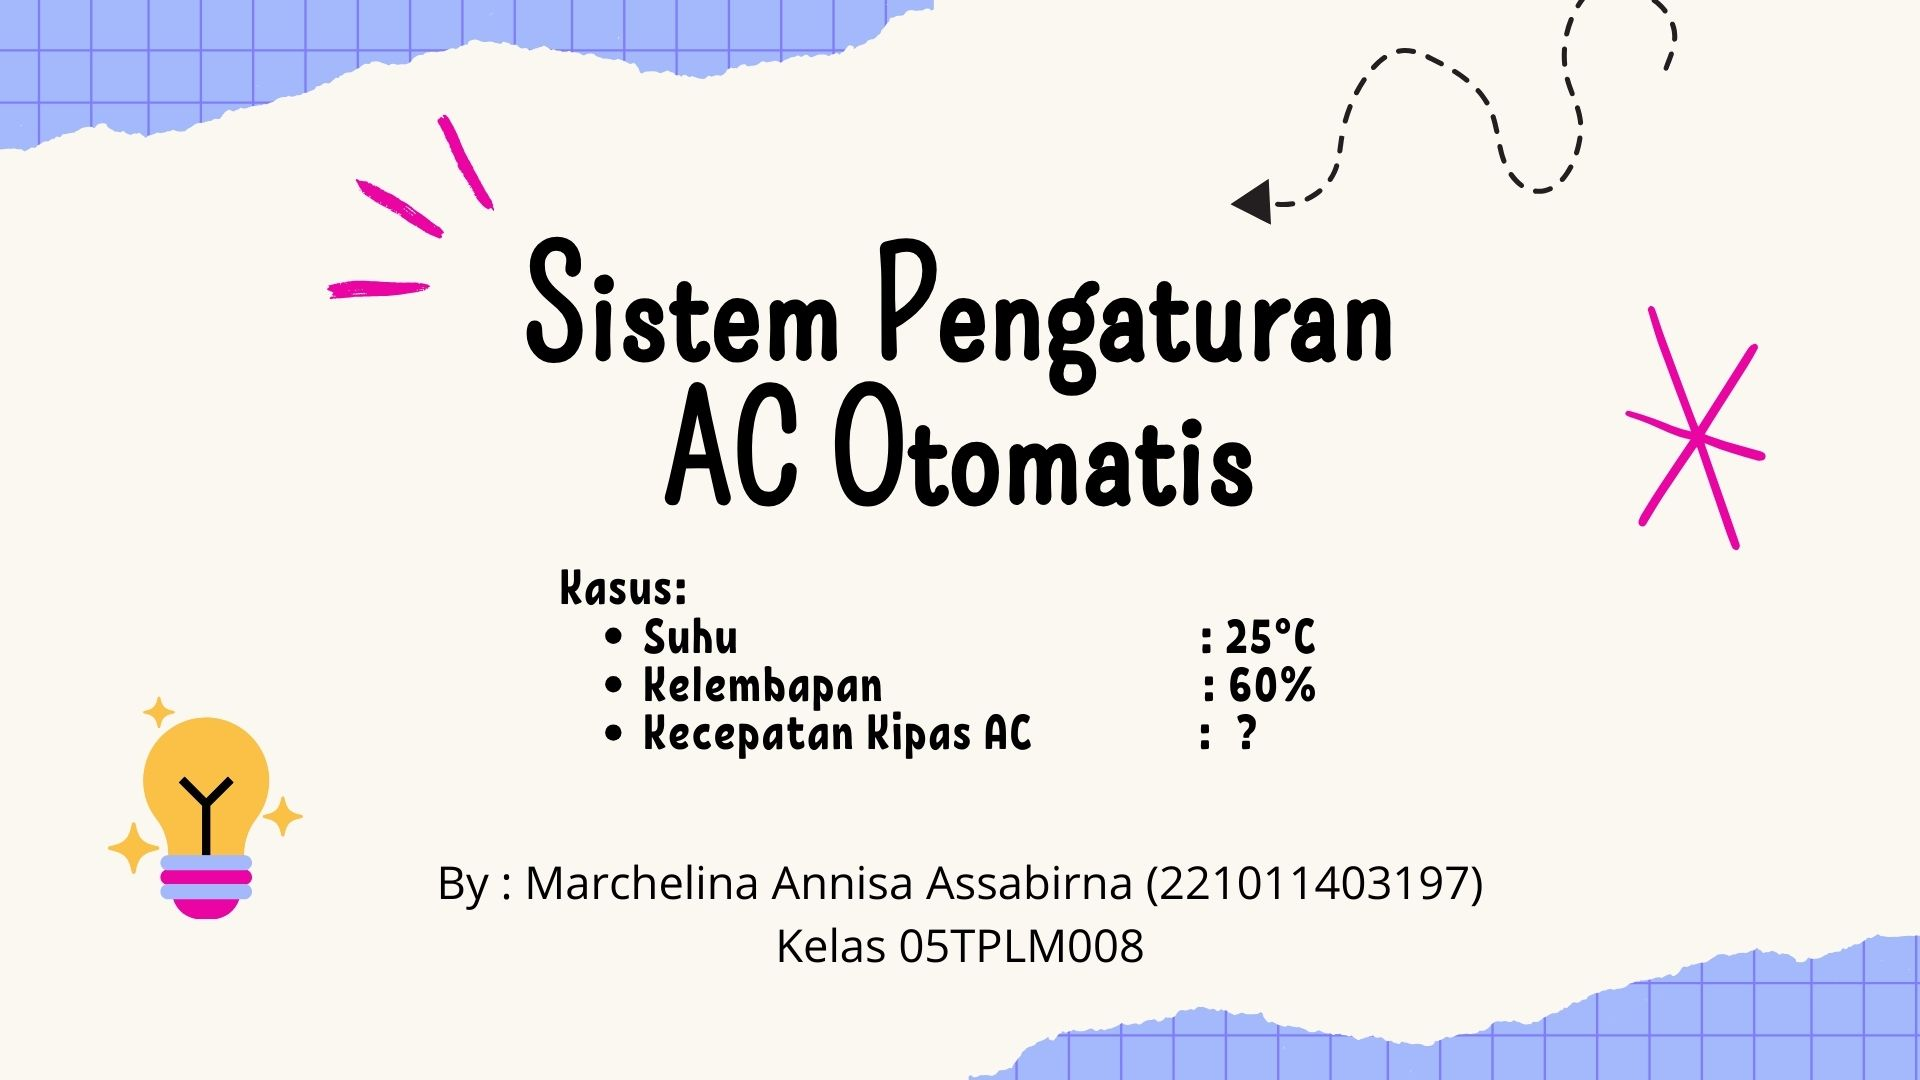

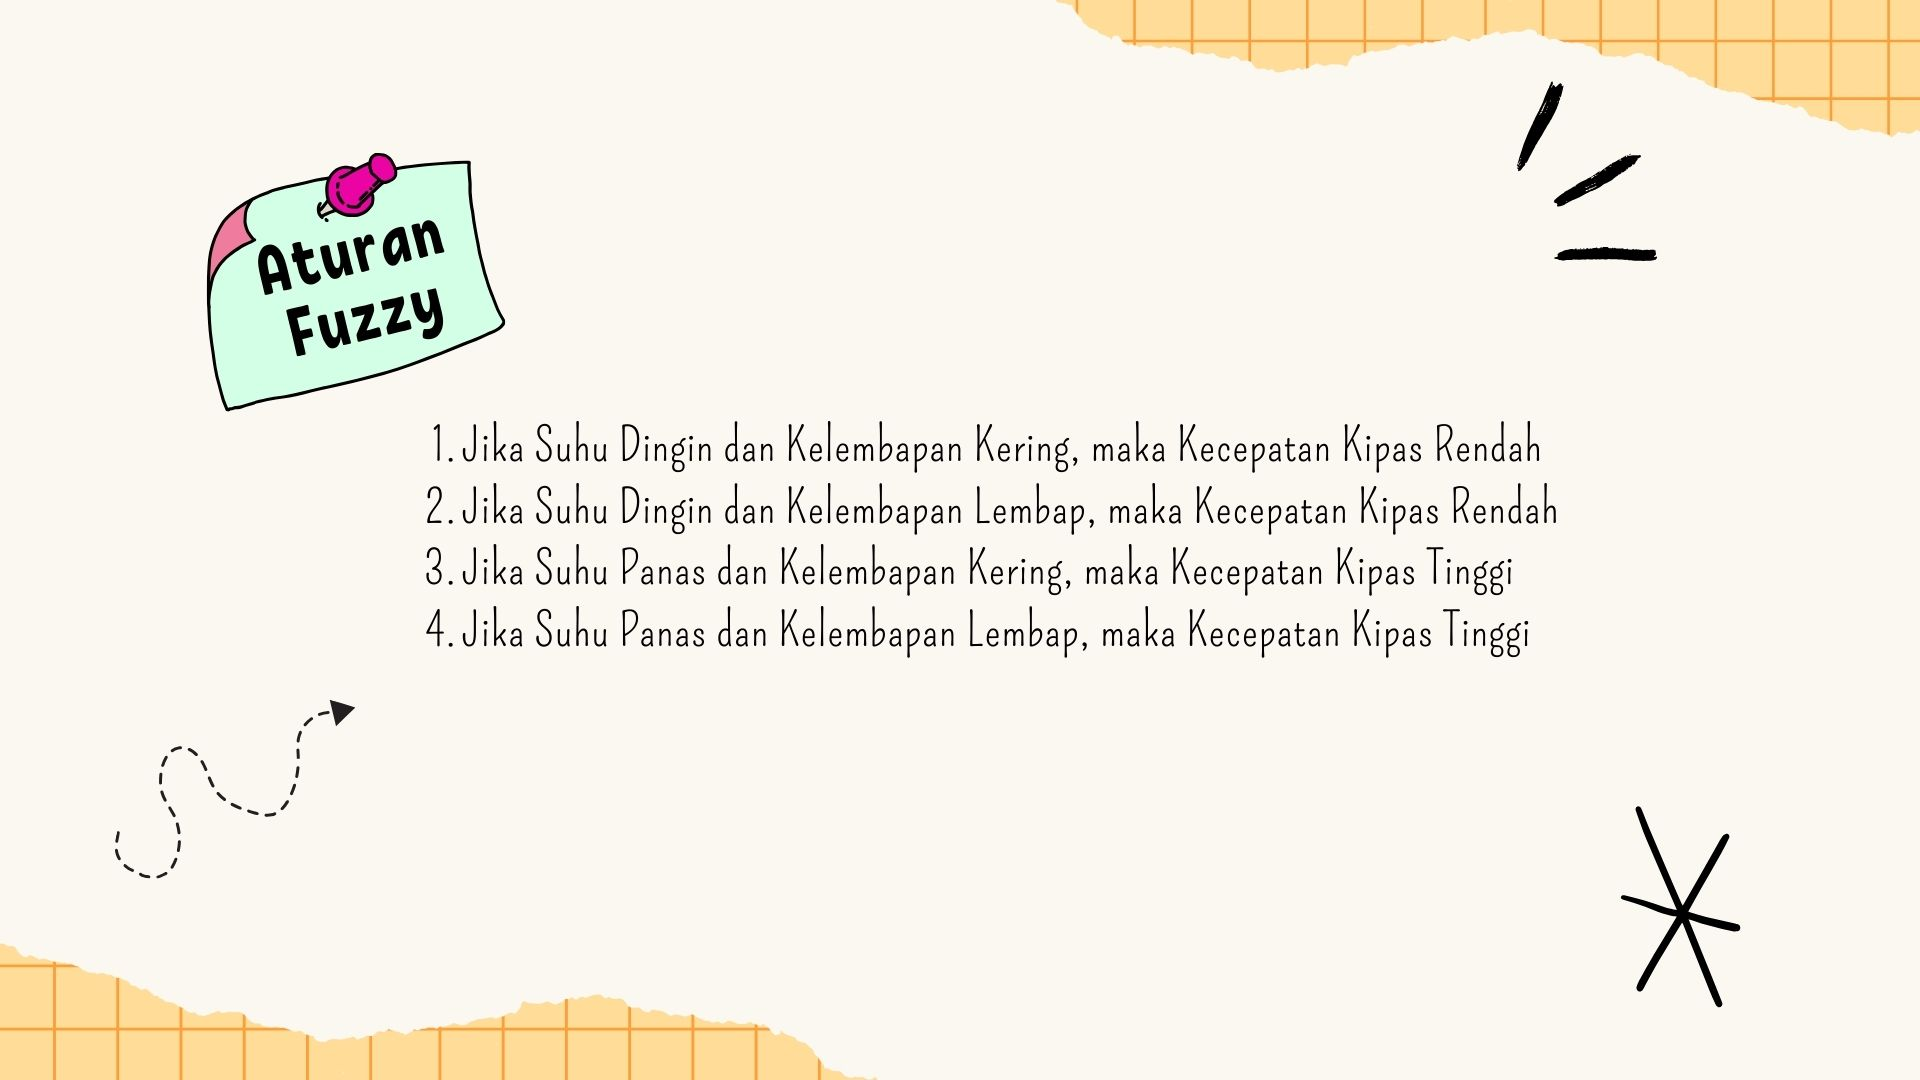

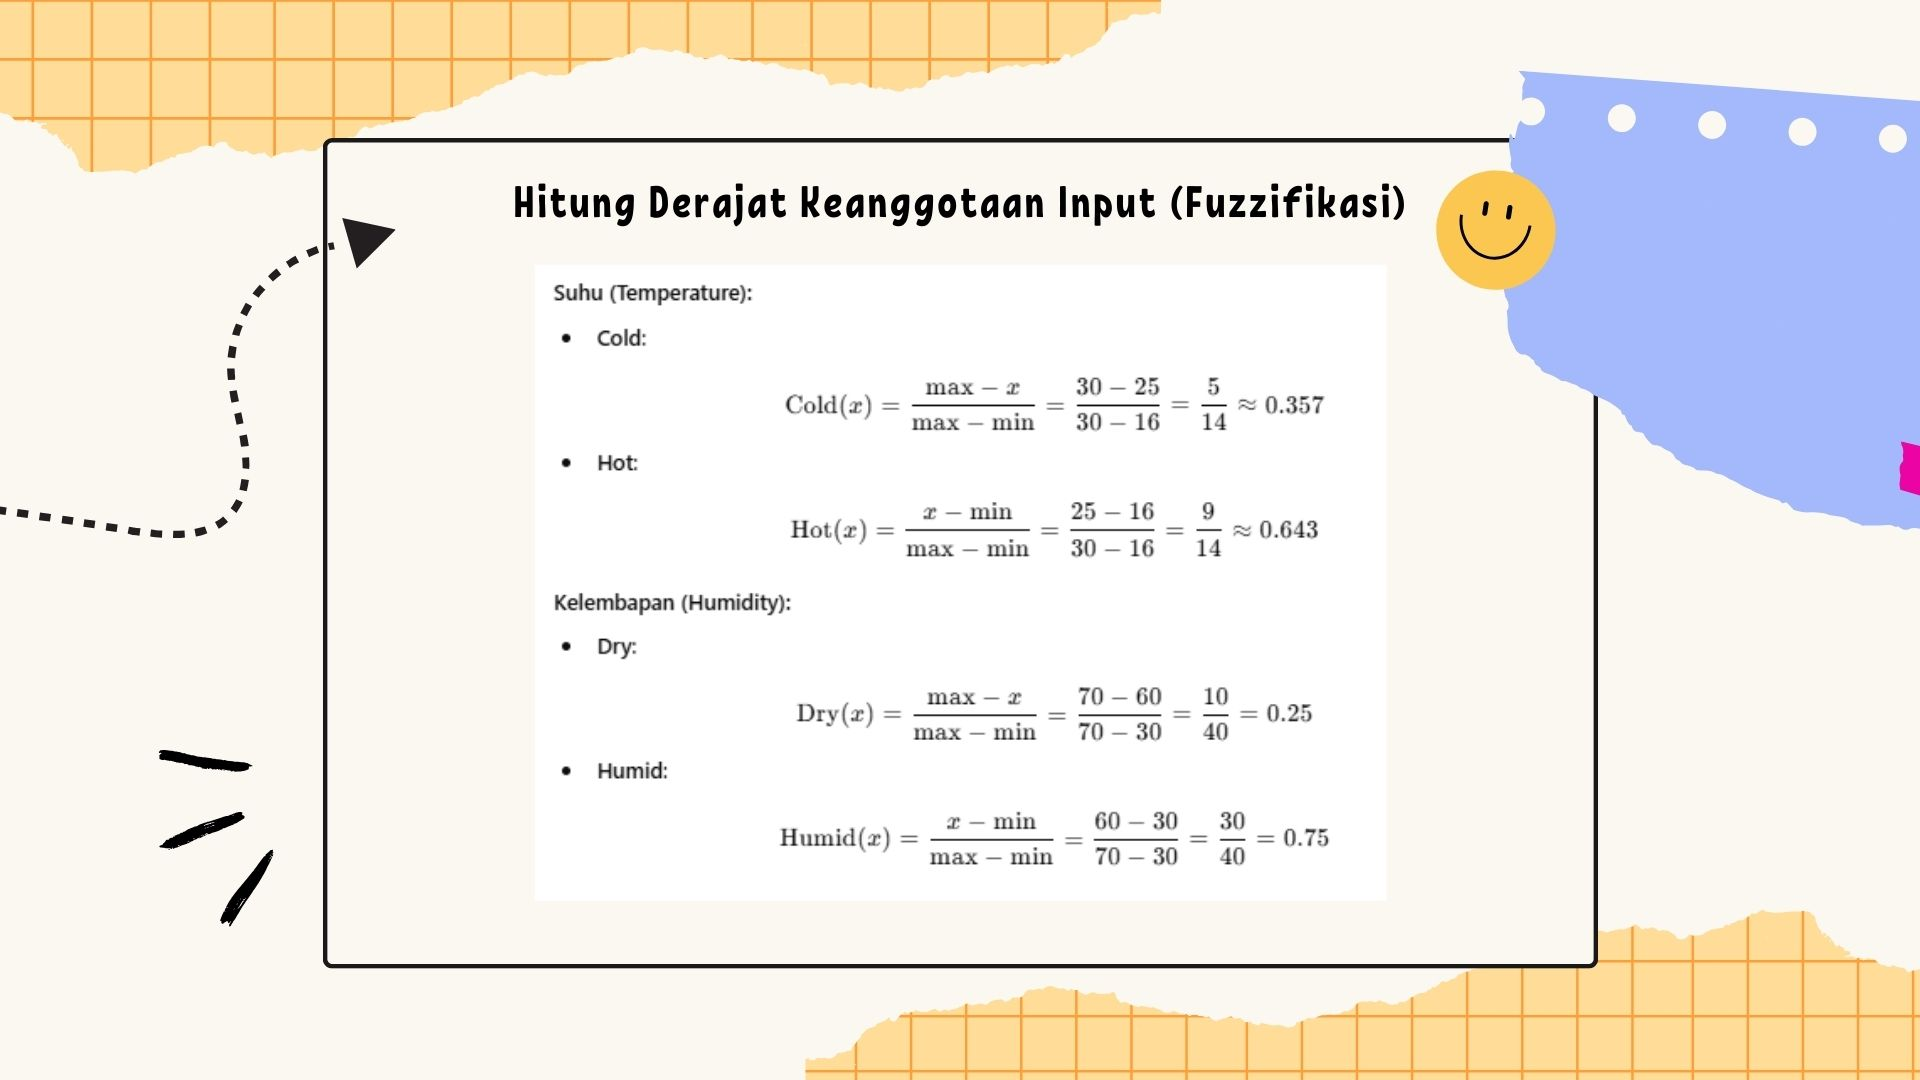

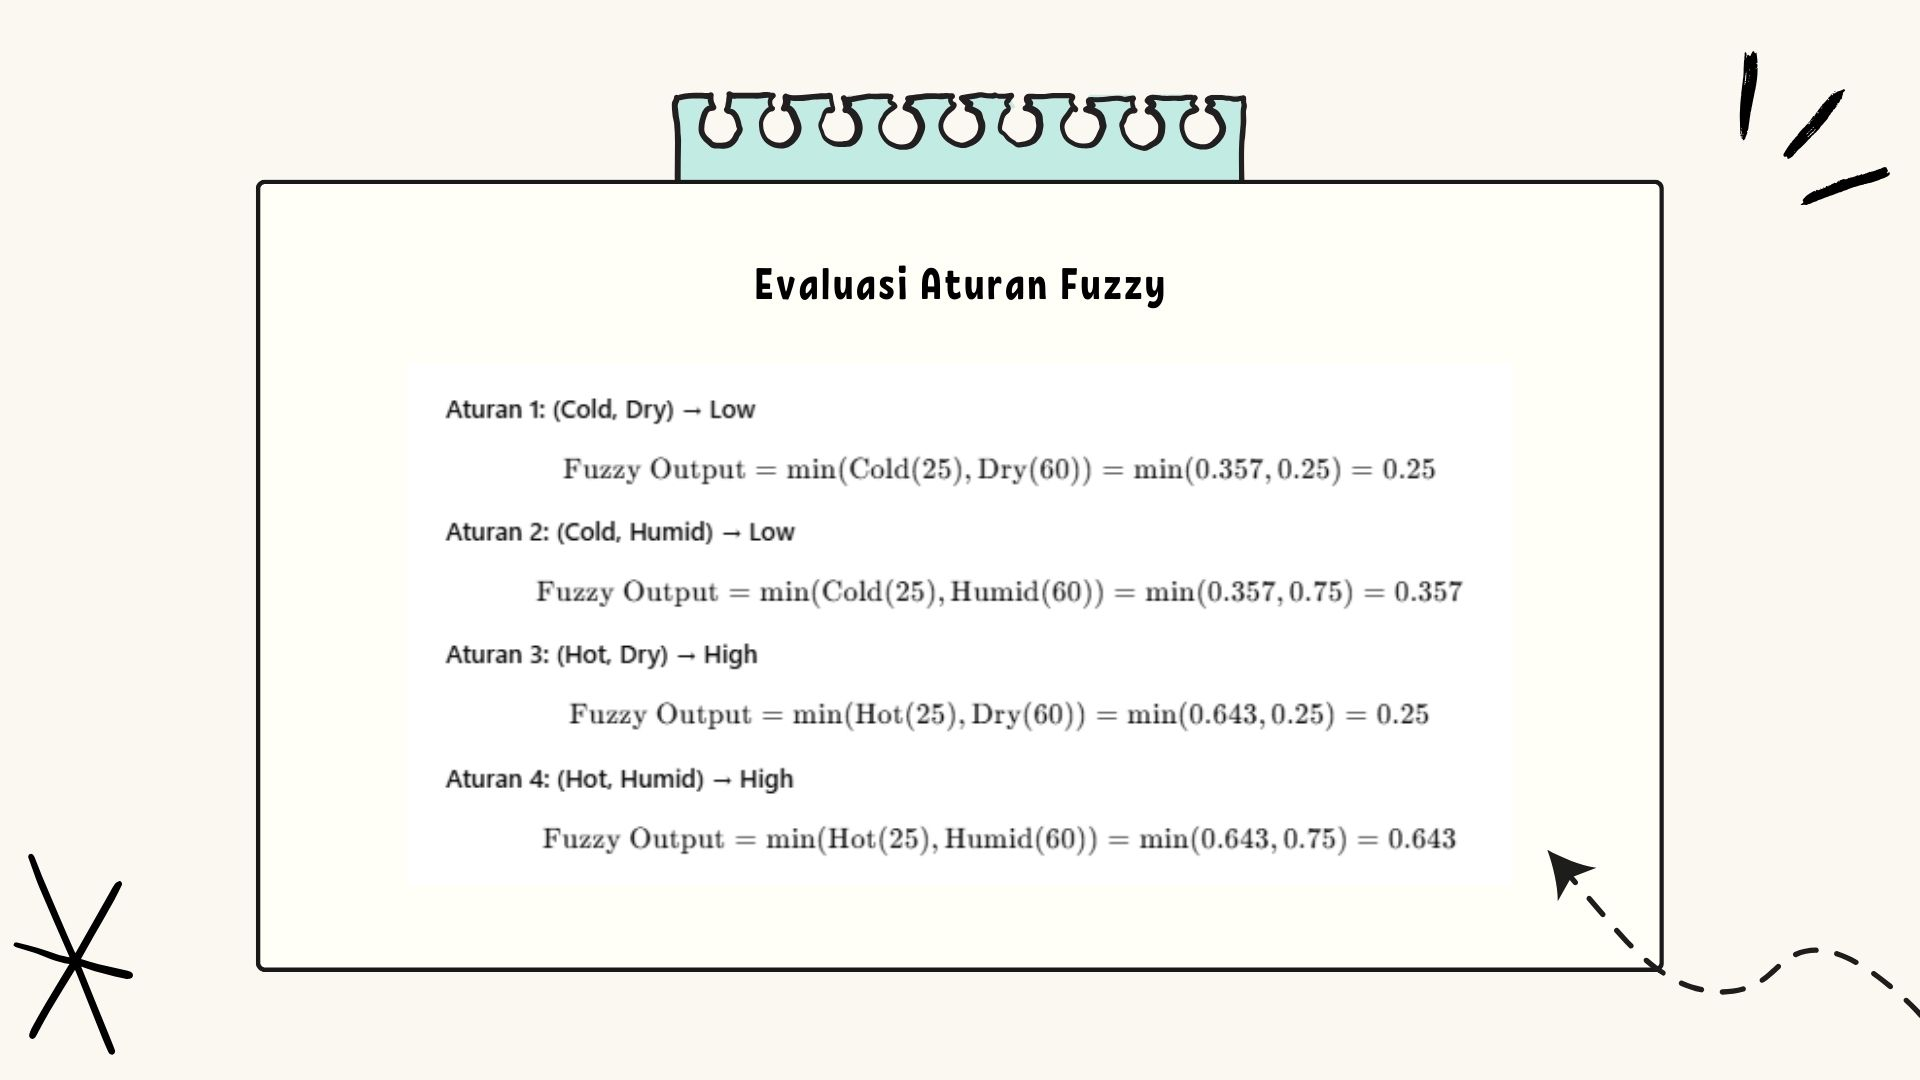

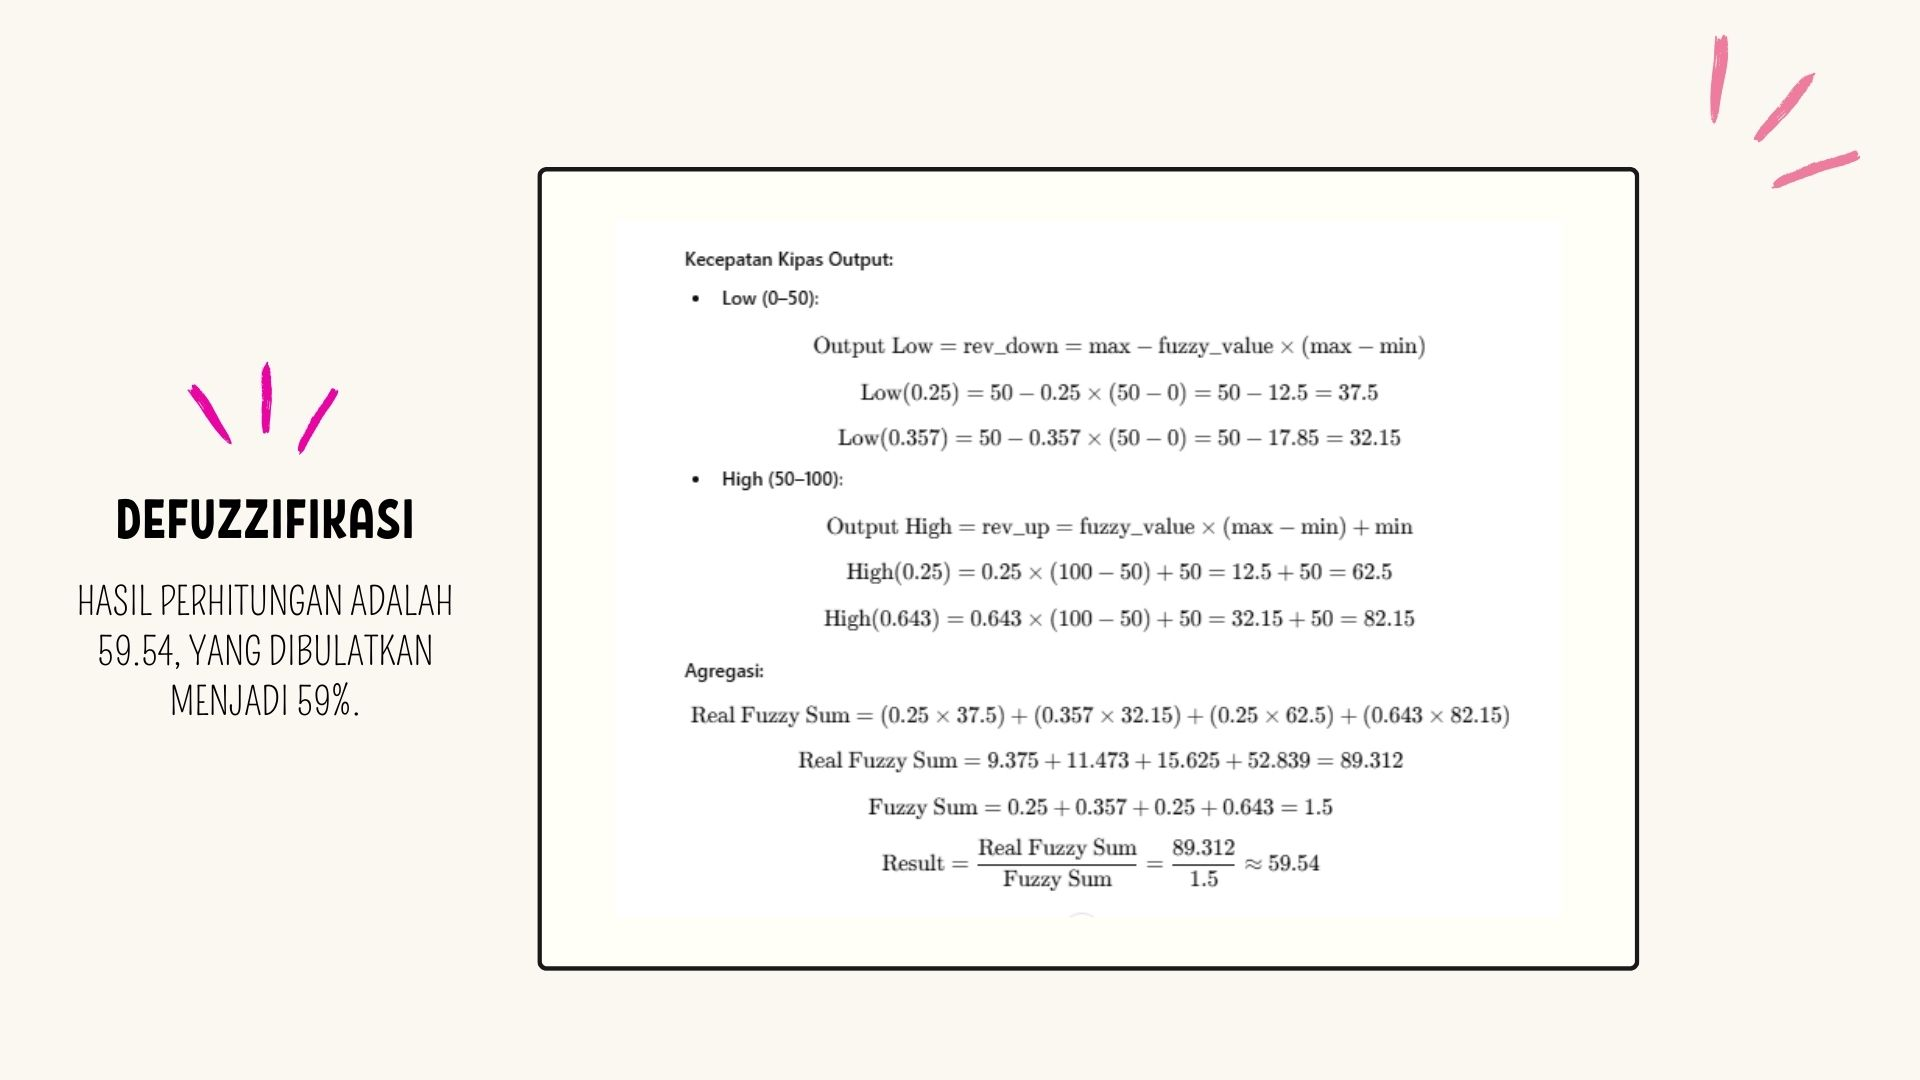

In [7]:
#SISTEM PENGATURAN AC OTOMATIS
#NAMA  : MARCHELINA ANNISA ASSABRINA
#NIM   : 221011403197
#KELAS : 05TPLM008


class Fuzzy:
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min

# Variabel Input
class Temperature(Fuzzy):
    def __init__(self):
        self.min = 16  # Min suhu (Celsius)
        self.max = 30  # Max suhu (Celsius)

    def cold(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def hot(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

class Humidity(Fuzzy):
    def __init__(self):
        self.min = 30  # Min kelembapan (%)
        self.max = 70  # Max kelembapan (%)

    def dry(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def humid(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

# Variabel Output
class FanSpeed(Fuzzy):
    def __init__(self):
        self.min = 0  # Kecepatan kipas minimum
        self.max = 100  # Kecepatan kipas maksimum

    def low(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def high(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

# Aturan Fuzzy
rule_map = {
    ("cold", "dry"): "low",
    ("cold", "humid"): "low",
    ("hot", "dry"): "high",
    ("hot", "humid"): "high",
}

# Perhitungan
temperature_value = 25  # Suhu ruangan (Celsius)
humidity_value = 60  # Kelembapan (%)

temperature = Temperature()
humidity = Humidity()
fan_speed = FanSpeed()

real_fuzzy_sum = 0
fuzzy_sum = 0

# Menambahkan print untuk melihat perhitungan intermediate
for k, v in rule_map.items():
    fuzzy_temp = getattr(temperature, k[0])(temperature_value)
    fuzzy_hum = getattr(humidity, k[1])(humidity_value)

    fuzzy_output = min(fuzzy_temp, fuzzy_hum)
    real_output = getattr(fan_speed, v)(fuzzy_output)

    real_fuzzy_sum += fuzzy_output * real_output
    fuzzy_sum += fuzzy_output

# Menambahkan penanganan pembagian dengan nol
if fuzzy_sum != 0:
    result = int(real_fuzzy_sum / fuzzy_sum)
else:
    result = 0  # Default jika fuzzy_sum = 0

print(f"Kecepatan kipas AC: {result}%")


Kecepatan kipas AC: 59%


In [3]:
# Perhitungan Fuzzy untuk Sistem Kecepatan Kipas AC

# Nilai Input
temperature_value = 25  # Suhu ruangan (Celsius)
humidity_value = 60  # Kelembapan (%)

# Inisialisasi Objek
temperature = Temperature()
humidity = Humidity()

# Perhitungan Keanggotaan untuk Temperature (Suhu)
cold = temperature.cold(temperature_value)
print(f"Himpunan cold: {cold}")

hot = temperature.hot(temperature_value)
print(f"Himpunan hot: {hot}")

# Perhitungan Keanggotaan untuk Humidity (Kelembapan)
dry = humidity.dry(humidity_value)
print(f"Himpunan dry: {dry}")

humid = humidity.humid(humidity_value)
print(f"Himpunan humid: {humid}")


Himpunan cold: 0.35714285714285715
Himpunan hot: 0.6428571428571429
Himpunan dry: 0.25
Himpunan humid: 0.75


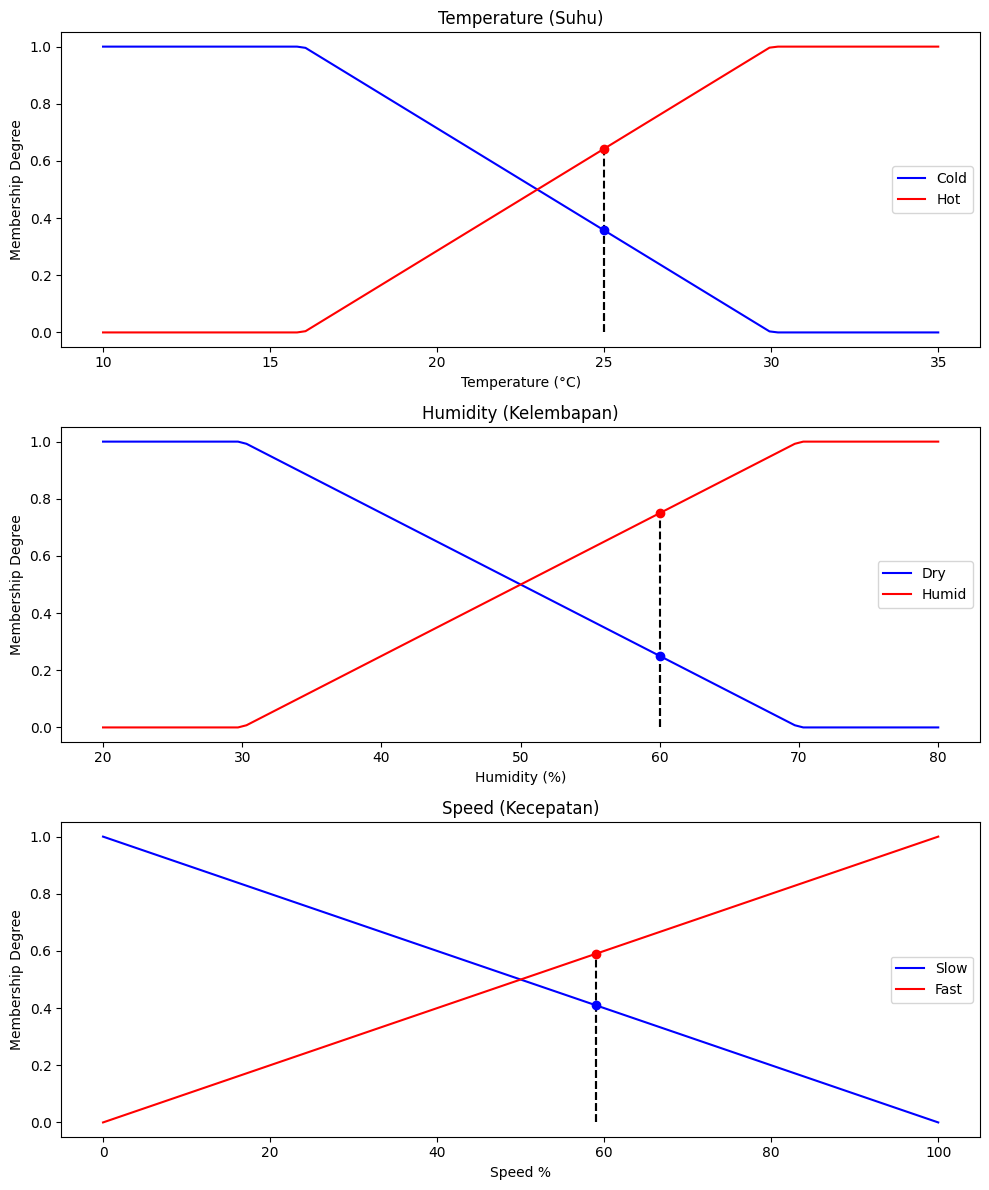

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Kelas Fuzzy
class Fuzzy:
    def __init__(self, min_val, max_val):
        self.min = min_val
        self.max = max_val

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

# Kelas turunan untuk Temperature, Humidity, dan Speed
class Temperature(Fuzzy):
    def __init__(self):
        super().__init__(16, 30)

    def cold(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def hot(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

class Humidity(Fuzzy):
    def __init__(self):
        super().__init__(30, 70)

    def dry(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def humid(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

class Speed(Fuzzy):
    def __init__(self):
        super().__init__(0, 100)  # Rentang kecepatan 0-100

    def slow(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def fast(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

# Variabel Input
temperature = Temperature()
humidity = Humidity()
speed = Speed()

# Range data
data_temperature = np.linspace(10, 35, 100)
data_humidity = np.linspace(20, 80, 100)
data_speed = np.linspace(0, 100, 100)

# Nilai contoh untuk garis putus-putus
x_temp = 25  # Suhu
x_hum = 60   # Kelembapan
x_speed = 59 # Kecepatan yang harus berada di titik 59%

# Membuat subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot untuk Temperature
axs[0].plot(data_temperature, [temperature.cold(x) for x in data_temperature], label='Cold', color='blue')
axs[0].plot(data_temperature, [temperature.hot(x) for x in data_temperature], label='Hot', color='red')
axs[0].plot([x_temp, x_temp], [0, temperature.cold(x_temp)], 'k--')
axs[0].plot([x_temp, x_temp], [0, temperature.hot(x_temp)], 'k--')
axs[0].scatter(x_temp, temperature.cold(x_temp), color='blue', zorder=5)
axs[0].scatter(x_temp, temperature.hot(x_temp), color='red', zorder=5)
axs[0].set_title('Temperature (Suhu)')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Membership Degree')
axs[0].legend()

# Plot untuk Humidity
axs[1].plot(data_humidity, [humidity.dry(x) for x in data_humidity], label='Dry', color='blue')
axs[1].plot(data_humidity, [humidity.humid(x) for x in data_humidity], label='Humid', color='red')
axs[1].plot([x_hum, x_hum], [0, humidity.dry(x_hum)], 'k--')
axs[1].plot([x_hum, x_hum], [0, humidity.humid(x_hum)], 'k--')
axs[1].scatter(x_hum, humidity.dry(x_hum), color='blue', zorder=5)
axs[1].scatter(x_hum, humidity.humid(x_hum), color='red', zorder=5)
axs[1].set_title('Humidity (Kelembapan)')
axs[1].set_xlabel('Humidity (%)')
axs[1].set_ylabel('Membership Degree')
axs[1].legend()

# Plot untuk Speed
axs[2].plot(data_speed, [speed.slow(x) for x in data_speed], label='Slow', color='blue')
axs[2].plot(data_speed, [speed.fast(x) for x in data_speed], label='Fast', color='red')
axs[2].plot([x_speed, x_speed], [0, speed.slow(x_speed)], 'k--')
axs[2].plot([x_speed, x_speed], [0, speed.fast(x_speed)], 'k--')
axs[2].scatter(x_speed, speed.slow(x_speed), color='blue', zorder=5)
axs[2].scatter(x_speed, speed.fast(x_speed), color='red', zorder=5)
axs[2].set_title('Speed (Kecepatan)')
axs[2].set_xlabel('Speed %')
axs[2].set_ylabel('Membership Degree')
axs[2].legend()

# Tampilkan plot
plt.tight_layout()
plt.show()
